# MNIST hand-written digits recognition

## Import of the necessary modules

In [35]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

## Loading of the digits dataset

In [2]:
digits = datasets.load_digits()

In [7]:
print(digits.keys())
print(" ")
print(digits.DESCR)

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
 
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each b

In [15]:
print(digits.images.shape) # this numpy array can be used to represent each digit graphically
print(digits.data.shape)   # each row of the numpy array digits.data represents the image of a digit, 
                           # each image being represented by 8x8 pixels, stored as a row of 64 features in digits.data,
print(digits.data[1010])   # each pixel having an intensity in grey color going from 1 to 16.
print(digits.target[1010]) # the numpy array digits.target stores the "label" ,ie here the outcome we want the model to predict.

(1797, 8, 8)
(1797, 64)
[  0.   0.   9.  12.  12.  12.   6.   0.   0.   1.  14.   6.   4.   4.   2.
   0.   0.   4.  15.  12.   9.   1.   0.   0.   0.   4.  15.   8.  11.  11.
   0.   0.   0.   0.   1.   0.   0.  14.   4.   0.   0.   0.   0.   0.   0.
  10.   8.   0.   0.   0.  10.   1.   0.   8.   8.   0.   0.   0.   9.  16.
  16.  15.   4.   0.]
5


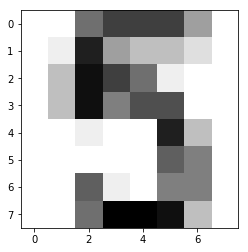

In [8]:
# As example, we show the 1010th row
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

## K-NN classifier

In [12]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [85]:
# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.23, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: 
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test,y_test))

0.98309178744


In [86]:
# Let's compute the score by ourselves
sum(knn.predict(X_test)==y_test)/len(X_test)

0.98309178743961356

In [87]:
# Let's see what digit is predicted by the model for the 14th image of X_test
print(knn.predict(X_test)[14])

4


In [88]:
# We verify:
print(y_test[14])

4


## Choice of best n_neighbors

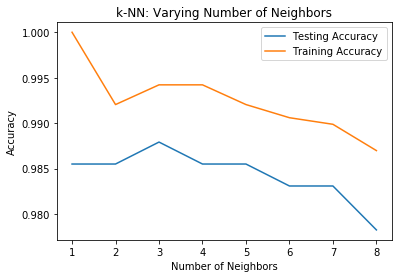

In [89]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data.  Note that the curve also depends on the value chosen for the test size.